# ejercico 1 parcial
Utilizce la regla del trapecio y la regla de Simpson para encontrar aproximaciones de,
$$ \int_1^3 \ln (x^4) dx$$
tales que, en cada caso, el error cometido sea inferior a $10^{-4}$

# Definciones



Para realizar las aproximaciones se utilizara la regla del Trapiecio y de Simpson.
Las definciones se sacan de Galeano, J. y Rodr ́ıguez C(pág 68, 70, 73 y 74)

### Teorema 4.1 (Regla del trapecio)

Sea $f$ una función acotada sobre el intervalo $[a, b]$. Podemos aproximar
$$
\int_a^b f(x) dx
$$
por medio de
$$
T_n = \frac{\Delta x}{2} (y_0 + 2y_1 + 2y_2 + \cdots + 2y_{n-1} + y_n),
$$
donde $P = \{a = x_0, x_1, \ldots, x_n = b\}$ es una partición del intervalo $[a, b]$ en $n$ subintervalos iguales, cada uno de longitud $\Delta x = \frac{b-a}{n}$, y donde $y_k = f(x_k)$.

#### Error en la regla del trapecio

Si $f''$ es continua y $M$ es una cota superior para los valores de $|f''|$ en $[a, b]$, entonces el error $E_T$ en la aproximación por la regla del trapecio, de la integral desde $a$ hasta $b$ de $f(x)$ en $n$ pasos, satisface la desigualdad
$$
|E_T| \leq \frac{M(b-a)^3}{12n^2}.
$$


### Teorema 4.6 (Regla de Simpson)

Sea $f$ una función acotada sobre el intervalo $[a, b]$. Podemos aproximar
$$
\int_a^b f(x) dx
$$
usando
$$
S = \frac{\Delta x}{3} \left( y_0 + 4y_1 + 2y_2 + 4y_3 + 2y_4 + \cdots + 2y_{n-2} + 4y_{n-1} + y_n \right),
$$
donde $n$ es par, $\Delta x = \frac{b-a}{n}$, $y_k = f(x_k)$ para $k = 0, 1, \ldots, n$.

#### Error en la regla de Simpson

Si $f^{(4)}$ es continua y $M$ es cualquier cota superior para los valores de $|f^{(4)}(x)|$ en $[a, b]$, entonces el error $E_S$ al aproximar la integral de $f(x)$ desde $a$ hasta $b$ con $n$ subintervalos satisface la desigualdad
$$
|E_S| \leq \frac{M(b-a)^5}{180n^4}.
$$


# Calculo

### general
la estimacion se realiza en `c++` con el estandar `c++17` con el objetivo de tener un mayor control de la exactitud de los valores, utilizando el tipo de variable `long double` que en arquitecturas de 64 bits (que son la mayoria) tendra una exactitud de 16 cifras decimales, si se desea ver a detalle cada funcion y cada calculo se puede ir a github.com/thomatrixting/integracion_numerica y ver los archivos donde `integracion.cpp` sera en el que estaran todas las funciones junto con la funcion `main` para correr la estimacion. En este documento se especificaran partes especificas del codigo y se pondra la salida

se define la funcion $f(x) = \ln(x^4)$ como la cual es usada atravez de la sigueinte funcion:

```
long double function(long double x){
    long double result = std::log( std::pow(x,4) );
    return result;
}
```



### modelo del trapecio

```
long double trapezoid_estimation(long double vmin, long double vmax, long n ,fptr fun){
    long double delta = (vmax - vmin)/(n);
    long double sum = 0;

    //add last and firts intem
    sum = sum + fun(vmin);
    sum = sum + fun(vmax);

    for (int i = 1; i<n; i++ ){ //exclude firts and last intem
        sum = sum + 2*fun(vmin + delta*i) ;
    }

    return (delta/2)*sum;
}
```
la cual recibe como argumentos los limites de integracion `vmim` y `vmax` que corresponden al $a$ y $b$ de la defincion del algoritmo, ademas del numero de intervalos `n` y la funcion a estimar como un puntero `fun`


## Aproximación del n del Trapecio
para saber cuantos n usar se realiza el siguiente procedemineto, teniendo en cuenta que la funcion es $$f(x) = \ln (x^4)$$ las deribadas son

### **Derivadas:**
1. Primera derivada:
   $$
   \frac{dy}{dx} = \frac{1}{x^4} \cdot 4x^3 = \frac{4}{x}
   $$
2. Segunda derivada:
   $$
   \frac{d^2y}{dx^2} = -\frac{4}{x^2}
   $$

Para calcular el valor de $M$, la cota superior de $|\frac{d^2y}{dx^2}| = \frac{4}{x^2}.$ en el intervalo $[1, 3]$, como $|\frac{d^2y}{dx^2}|$ es un cociente encones se toma el valor mas pequeño de x ($x=1$) ya que este sera la cota superior:

En $x = 1$:
$$
|\frac{d^2y}{dx^2}| = \frac{4}{1^2} = 4
$$

El máximo valor de $|f''(x)|$ en $[1, 3]$ es $M = 4$.
### **subtitucion de los valores:**

Para encontrar el valor inferior de $n$, el número de particiones necesarias para la aproximación del trapecio con un error menor o igual a $10^{-4}$, usamos la fórmula del error:
$$
|E_T| \leq \frac{M(b-a)^3}{12n^2}
$$

Sustituyendo los valores:
$$
10^{-4} \leq \frac{4(3-1)^3}{12n^2}
$$

### **Simplificación:**
se tiene que:
$$
(3-1)^3 = 2^3 = 8.
$$
Entonces:
$$
\frac{4(3-1)^3}{12n^2} = \frac{4 \cdot 8}{12n^2} = \frac{32}{12n^2} = \frac{8}{3n^2}
$$
Simplificando:


La desigualdad se convierte en:
$$
10^{-4} \leq \frac{8}{3n^2}
$$

### **Despejamos $n$:**
$$
10^{-4} \leq \frac{8}{3n^2}\implies
10^{-4} \cdot 3n^2 \leq 8 \implies
n^2 \geq \frac{8}{3 \cdot 10^{-4}}
$$
despejando para el valor minimo:
$$
|n| \geq \sqrt{\frac{8}{3 \cdot 10^{-4}}} \implies n \geq \sqrt{\frac{8}{3 \cdot 10^{-4}}} \approx 164
$$
### **Resultado final:**
El valor entero más cercano para $n$ es:
$$
n = 164.
$$
Por lo tanto, se requieren **164 particiones** para garantizar que el error sea menor o igual a $10^{-4}$.


con el valor de $n$ se procede a hacer el calculo utilizando la funcion antes expuesta con los argumento de `n=164`,`vmin=1`,`vmax=3` obteniendo como salida de la funcion:

```
estimacion trapezoid: 5.183314415142979793e+00
estimacion error: 6.376011889255958805e-04
```
que como se ve que es exacto hasta la cuarta cifra ya que el valor real hasta la cuarta cifra segun el anexo 1 es de $5.1833$, algo que tambien se ve con el error relativo que es de escala $10^{-4}$.


## modelo de Simpsom
teniendo en cuenta la definicion del la regla de Simpson se realiza la sigueinte funcion


```
long double simpsom_estimation(long double vmin, long double vmax, long n ,fptr fun){
    long double delta = (vmax - vmin)/(n);
    long double sum = 0;

    //add last and firts intem
    sum = sum + fun(vmin);
    sum = sum + fun(vmax);

    for (int i = 1; i<n; i=i+2 ){ //exclude firts and last intem and iterate in odd numbers
        sum = sum + 4*fun(vmin + delta*i) ;
    }
    for (int i = 2; i<n; i=i+2 ){ //exclude firts and last intem and iterate in even numbers
        sum = sum + 2*fun(vmin + delta*i) ;
    }

    return (delta/3)*sum;

}
```
la cual recibe como argumentos los limites de integracion `vmim` y `vmax` que corresponden al $a$ y $b$ de la defincion del algoritmo, ademas del numero de intervalos `n` (que solo puede ser par) y la funcion a estimar como un puntero `fun`



## Aproximación de Simpson

Para la función $f(x) = \ln (x^4)$ se calcula su cuarta derivada, ya que es necesaria para la fórmula del error en la regla de Simpson:

### **Derivadas:**
1. Primera derivada:
   $$
   \frac{dy}{dx} = \frac{1}{x^4} \cdot 4x^3 = \frac{4}{x}
   $$
2. Segunda derivada:
   $$
   \frac{d^2y}{dx^2} = -\frac{4}{x^2}
   $$
3. Tercera derivada:
   $$
   \frac{d^3y}{dx^3} = \frac{8}{x^3}
   $$
4. Cuarta derivada:
   $$
   \frac{d^4y}{dx^4} = -\frac{24}{x^4}
   $$

### **Subtitucion de valores:**
Para determinar el valor inferior de $n$, el número de particiones necesarias para que el error sea menor o igual a $10^{-4}$, usamos la fórmula del error de Simpson:
$$
|E_S| \leq \frac{M(b-a)^5}{180n^4}
$$

Aquí, $M$ es una cota superior para $|f^{(4)}(x)|$ en $[a, b]$. Tomando $|f^{(4)}(x)| = \frac{24}{x^4}$, el valor máximo en el intervalo $[1, 3]$ ocurre en $x = 1$ al ser un cociente:
$$
M = \left| f^{(4)}(1) \right| = 24
$$

Sustituimos los valores:
$$
10^{-4} \leq \frac{24(3-1)^5}{180n^4}
$$

### **Simplificación:**
se tiene que
$$
(3-1)^5 = 2^5 = 32
$$
Entonces:
$$
10^{-4} \leq \frac{24 \cdot 32}{180n^4}=
\frac{24 \cdot 32}{180} = \frac{768}{180} = \frac{128}{30}
$$
La desigualdad queda:
$$
10^{-4} \leq \frac{128}{30n^4}
$$

### **Despeje de $n$:**

$$
10^{-4} \leq \frac{128}{30n^4} \implies
10^{-4} \cdot 30n^4 \leq 128 \implies
n^4 \geq \frac{128}{30 \cdot 10^{-4}}
$$

Por lo tanto se tiene que depenjando para el valor minimo
$$
|n| \geq  {\sqrt[4] {\frac{128}{30 \cdot 10^{-4}}}} \implies
n \geq  {\sqrt[4] {\frac{128}{30 \cdot 10^{-4}}}} \approx 16
$$

### **resultado de final:**
se necesitan $16$ intervalos para complir que el error sea menor a $10^{-4}$


teniendo el valor del n para simpsom se calcula la funcion antes mencionada con el valor de `n=16`,`vmin=1`,`vmax=3` con lo que se obtiene:


```
estimation simpsom: 5.183337245430172598e+00
estimation error: 1.971430115396775179e-04
```
que como se ve es exacto hasta la cuarta cifra como se pedia con el n, ya que segun el anexo 1 el valor de la integral es de $5.1833$



# verificacion grafica

con el objetivo de verificar que los estimadores de la regla del trapecio y la de simsom son correctos, ademas de observar el error computacional se realiza la siguiente grafica, que relacionara el error de cada una de los estimadores conforme a se varia el $n$, esto se hace para el tango de $[10,1000]$ saltando de 4 en 4 valores

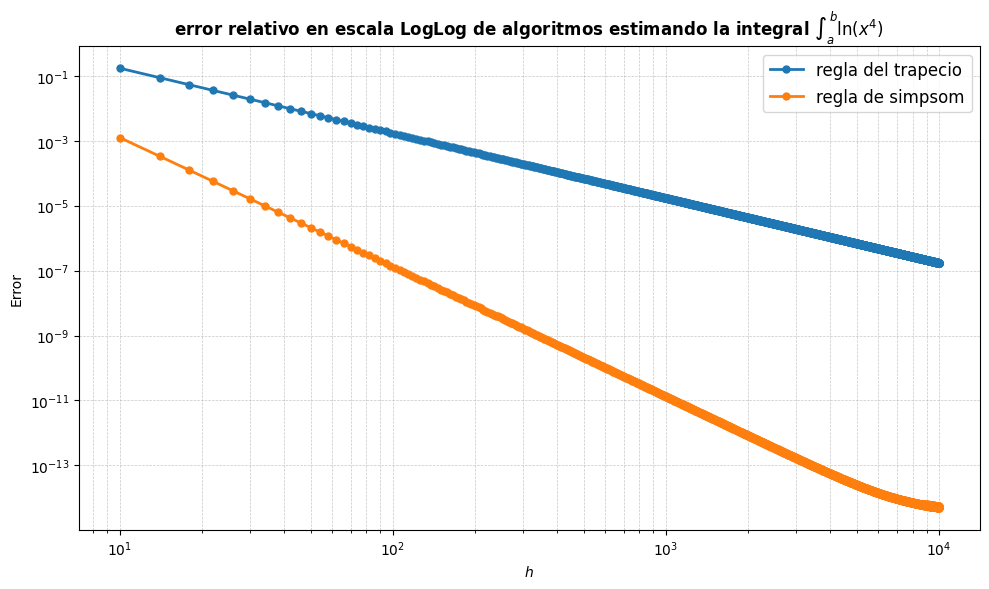

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('datos.csv')


# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data

ax.plot('n', 'trapezoid_error', label='regla del trapecio', linewidth=2, linestyle='-', marker='o', markersize=3, data = df, color = "#2f45bf")
ax.plot('n', 'simpsom_error', label='regla de simpsom', linewidth=2, linestyle='-', marker='o', markersize=3, data = df, color = "#f2921d")


# Add grid
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.axhline(10**(-4),label = r"precision de $10^{-4}$", color = "red",  linestyle='--', alpha=0.5)
plt.axvline(164,label = r"valor n trapecio", color = "#2f45bf", linestyle='--', alpha=0.5)
plt.axvline(16,label = r"valor n simpsom", color = "#f2921d", linestyle='--', alpha=0.5)


# Customize the plot
ax.set_title(r'error relativo en escala LogLog de algoritmos estimando la integral $\int^{b}_a\ln (x^4)$', fontsize=12, weight='bold')
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$h$")
ax.set_ylabel(r"Error relativo")
ax.legend(fontsize=12)
# Adjust tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)

# Tight layout for better spacing
plt.tight_layout()
# Show the plot
plt.savefig('figura_1.pdf', format='pdf', bbox_inches='tight')
plt.show()

en el que se puede apreciar como el error cae mucho mas rapido con la estimacion de simpsom que con la del trapcio, ademas de que como se veia en el ejercicio anterior a la estiamcion de simpson solo le toma menos de $n=20$ llegar a la precision deseada cuando para la del trapecio le toma mas de $n=150$ para llegar a la misma precicion, y como tambien la estiamcion del trapecion solo llega a una presicion de 7 cifras con $n=1000$ cunado ya 15 cifras de presicion

# anexos y bibliografia

- Galeano, J. y Rodr ́ıguez C. C ́alculo integral en una variable. Universidad Nacional de Colombia.

## Anexo 1: calculo de integral
con el objetivo de calcular el error de la estimacion se calcula la integral teoricamente:
$$
\int_1^3 \ln(x^4) \, dx
$$

### **simplificacion**
por propiedades se tiene:
$$
 \int_1^3 \ln(x^4) \, dx =\int_1^3 4\ln(x) \, dx
 = 4 \int_1^3 \ln(x) \, dx
$$

### **resolver integral**
sabiendo que la integral de $\ln(x)$ es
$$
\int \ln(x) \, dx = x \ln(x) - x + C
$$
se tiene:
$$
4\int_1^3 \ln(x) \, dx = 4\left[ x \ln(x) - x \right]_1^3
$$

### **Evaluar**
Evaluamos $x \ln(x) - x$ en $x = 3$ y $x = 1$:

- En $x = 3$:
  $$
  3 \ln(3) - 3
  $$

- En $x = 1$:
  $$
  1 \ln(1) - 1 = 0 - 1 = -1
  $$

### **subtitucion**
$$
4\int_1^3 \ln(x) \, dx = 4 [\left ( 3 \ln(3) - 3 \right) - \left( -1 \right)]
 = 12 \ln(3) - 12 + 4 = 12 \ln(3) - 8
$$
### **resultado**
se obtine que el valor teoriico de la integral es $$12ln(3)-8 \approx 5.1833$$




con esta informacion se define la funcion:


```
long double define_integral(void){

    return 12*std::log(3) - 8; //the exact value is set to reduce the computacional error

}
```
que calculara el valor exacto a 18 cifras decimales y sera el valor que se use para calcular el error relativo

